In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

21692
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pylib.mix as mix
import pylib.qucf_read as qucf_r
import pylib.qucf_oracle as qucf_o
import pylib.qucf_matrix_D as qucf_m
import kin1d1d as kin
path_ = "../simulations/KIN1D1D/"
path_D_ = "../simulations/KIN1D1D/matrices-D/"
file_name_oracle_ = "circuit_OH"
path_test_ = "../simulations/test-simplified/"
path_cl_ = "../results/KIN1D1D-results/"
path_save_ = "../results/KIN1D1D-results/figs/"
file_name_oracle_ = "circuit_OH"

In [4]:
# ---------------------------------------------------------------
# --- Read matrices D from quantum simulations ---
# ---------------------------------------------------------------
mix.reload_module(qucf_r)

print()
dd_44 = qucf_r.read_matrix_sparse(path_D_, "flat_44_OUTPUT.hdf5") #  nv = 4, nx = 4 

print()
dd_45 = qucf_r.read_matrix_sparse(path_D_, "flat_45_OUTPUT.hdf5") #  nv = 4, nx = 5 


print()
dd_54 = qucf_r.read_matrix_sparse(path_D_, "flat_54_OUTPUT.hdf5") #  nx = 5, nv = 4

print()
dd_55 = qucf_r.read_matrix_sparse(path_D_, "flat_55_OUTPUT.hdf5") #  nx = 5, nv = 5


# print()
# dd_64 = qucf_r.read_matrix_sparse(path_D_, "flat_64_OUTPUT.hdf5") #  nx = 6, nv = 4

# print()
# dd_65 = qucf_r.read_matrix_sparse(path_D_, "flat_65_OUTPUT.hdf5") #  nx = 6, nv = 5

# print()
# dd_66 = qucf_r.read_matrix_sparse(path_D_, "flat_66_OUTPUT.hdf5") #  nx = 6, nv = 6


Reading the matrix from: flat_44_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-06-2023 08:57:47
matrix name:  U_BE
N = 512

Reading the matrix from: flat_45_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:42:09
matrix name:  U_BE
N = 1024

Reading the matrix from: flat_54_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:48:52
matrix name:  U_BE
N = 1024

Reading the matrix from: flat_55_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:52:48
matrix name:  U_BE
N = 2048


In [5]:
# ---------------------------------------------------------------
# --- Read matrices from classical simulations ---
# ---------------------------------------------------------------
mix.reload_module(kin)

print("\n --- Classical data (A matrix) ---")

cl_44 = kin.read_matrix_sparse(path_cl_, "out_4_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_45 = kin.read_matrix_sparse(path_cl_, "out_4_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_46 = kin.read_matrix_sparse(path_cl_, "out_4_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_47 = kin.read_matrix_sparse(path_cl_, "out_4_7_w1.2_Lx100_Lv4_flat.hdf5")
cl_48 = kin.read_matrix_sparse(path_cl_, "out_4_8_w1.2_Lx100_Lv4_flat.hdf5")

cl_54 = kin.read_matrix_sparse(path_cl_, "out_5_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_55 = kin.read_matrix_sparse(path_cl_, "out_5_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_56 = kin.read_matrix_sparse(path_cl_, "out_5_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_57 = kin.read_matrix_sparse(path_cl_, "out_5_7_w1.2_Lx100_Lv4_flat.hdf5")
cl_58 = kin.read_matrix_sparse(path_cl_, "out_5_8_w1.2_Lx100_Lv4_flat.hdf5")

cl_64 = kin.read_matrix_sparse(path_cl_, "out_6_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_65 = kin.read_matrix_sparse(path_cl_, "out_6_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_66 = kin.read_matrix_sparse(path_cl_, "out_6_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_67 = kin.read_matrix_sparse(path_cl_, "out_6_7_w1.2_Lx100_Lv4_flat.hdf5")
cl_68 = kin.read_matrix_sparse(path_cl_, "out_6_8_w1.2_Lx100_Lv4_flat.hdf5")

cl_74 = kin.read_matrix_sparse(path_cl_, "out_7_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_75 = kin.read_matrix_sparse(path_cl_, "out_7_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_76 = kin.read_matrix_sparse(path_cl_, "out_7_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_77 = kin.read_matrix_sparse(path_cl_, "out_7_7_w1.2_Lx100_Lv4_flat.hdf5")
cl_78 = kin.read_matrix_sparse(path_cl_, "out_7_8_w1.2_Lx100_Lv4_flat.hdf5")

cl_84 = kin.read_matrix_sparse(path_cl_, "out_8_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_85 = kin.read_matrix_sparse(path_cl_, "out_8_5_w1.2_Lx100_Lv4_flat.hdf5")
cl_86 = kin.read_matrix_sparse(path_cl_, "out_8_6_w1.2_Lx100_Lv4_flat.hdf5")
cl_87 = kin.read_matrix_sparse(path_cl_, "out_8_7_w1.2_Lx100_Lv4_flat.hdf5")
cl_88 = kin.read_matrix_sparse(path_cl_, "out_8_8_w1.2_Lx100_Lv4_flat.hdf5")


 --- Classical data (A matrix) ---
Reading data from out_4_4_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  06-06-2023 16:39:51
N, nx, nv = 512, 4, 4
Done.

Reading data from out_4_5_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  07-28-2023 11:12:43
N, nx, nv = 1024, 4, 5
Done.

Reading data from out_4_6_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  08-09-2023 16:53:04
N, nx, nv = 2048, 4, 6
Done.

Reading data from out_4_7_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  08-09-2023 16:53:12
N, nx, nv = 4096, 4, 7
Done.

Reading data from out_4_8_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  08-12-2023 15:25:49
N, nx, nv = 8192, 4, 8
Done.

Reading data from out_5_4_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  06-06-2023 16:41:57
N, nx, nv = 1024, 5, 4
Done.

Reading data from out_5_5_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  06-06-2023 16:42:03
N, nx, nv = 2048, 5, 5
Done.

Reading data from out_5_6_w1.2_Lx100_Lv4_flat.hdf5...
date of 

In [23]:
# ------------------------------------------------------------
# --- Chosen structures ---
# ------------------------------------------------------------

# dd_c_, nx_work, nv_work = dict(cl_44), 4, 4
# dd_c_, nx_work, nv_work = dict(cl_45), 4, 5
# dd_c_, nx_work, nv_work = dict(cl_46), 4, 6
# dd_c_, nx_work, nv_work = dict(cl_47), 4, 7
# dd_c_, nx_work, nv_work = dict(cl_48), 4, 8

# dd_c_, nx_work, nv_work = dict(cl_54), 5, 4
# dd_c_, nx_work, nv_work = dict(cl_55), 5, 5
# dd_c_, nx_work, nv_work = dict(cl_56), 5, 6
# dd_c_, nx_work, nv_work = dict(cl_57), 5, 7
# dd_c_, nx_work, nv_work = dict(cl_58), 5, 8

# dd_c_, nx_work, nv_work = dict(cl_64), 6, 4
# dd_c_, nx_work, nv_work = dict(cl_65), 6, 5
# dd_c_, nx_work, nv_work = dict(cl_66), 6, 6
# dd_c_, nx_work, nv_work = dict(cl_67), 6, 7
# dd_c_, nx_work, nv_work = dict(cl_68), 6, 8

# dd_c_, nx_work, nv_work = dict(cl_74), 7, 4
# dd_c_, nx_work, nv_work = dict(cl_75), 7, 5
# dd_c_, nx_work, nv_work = dict(cl_76), 7, 6
# dd_c_, nx_work, nv_work = dict(cl_77), 7, 7
dd_c_, nx_work, nv_work = dict(cl_78), 7, 8

# dd_c_, nx_work, nv_work = dict(cl_84), 8, 4
# dd_c_, nx_work, nv_work = dict(cl_85), 8, 5
# dd_c_, nx_work, nv_work = dict(cl_86), 8, 6
# dd_c_, nx_work, nv_work = dict(cl_87), 8, 7
# dd_c_, nx_work, nv_work = dict(cl_88), 8, 8

In [24]:
# ---------------------------------------------------------------
# --- Extrapolate the matrix D_F ---
# ---------------------------------------------------------------
mix.reload_module(kin)
mix.reload_module(qucf_m)
mix.reload_module(mix)

Nx_work = 1 << nx_work
Nv_work = 1 << nv_work
Nvar_work = Nx_work * Nv_work

grid_44 = qucf_m.SectionsGrid__(kin.init_matrix_and_circuit(dd_44))
grid_45 = qucf_m.SectionsGrid__(kin.init_matrix_and_circuit(dd_45))
grid_54 = qucf_m.SectionsGrid__(kin.init_matrix_and_circuit(dd_54))

oo_extr = qucf_m.Extrapolation__([grid_44, grid_45, grid_54])
oo_extr.create_extrapolation_template()

oo_circ = kin.init_circuit_of_defined_size(nx_work, nv_work, 3, 3)
D_F = oo_extr.reconstruct_matrix(oo_circ)

All grids have the same number of sizes.
The correct number of grids is provided.
Grids have similiar structure.


In [8]:
# ------------------------------------------------------------------------------------------
# --- [OPTIONAL] Compare the reconstructed matrix D with the calculated one if available ---
# ------------------------------------------------------------------------------------------
mix.reload_module(mix)

dd_compare = dd_44


D_to_compare = dd_compare["A"].get_slice(0, 0, Nvar_work)
D_F.is_the_same_as(D_to_compare, oo_circ.prec_)

del dd_compare, D_to_compare

Error in SparseMatrix: the row index is beyond the size of the matrix.


SystemExit: -1

/media/work/docs/codes/QuCF/scripts-py/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [25]:
# -------------------------------------------------------------
# --- Normalize the matrix and define the circuit structure ---
# -------------------------------------------------------------
from termcolor import colored
mix.reload_module(mix)
mix.reload_module(qucf_o)
mix.reload_module(kin)

A_norm = kin.normalize_matrix_A(dd_c_["A"], D_F, nv_work)
A_F    = A_norm.get_slice(0, 0, Nvar_work)

if D_F.get_Nnz() != A_F.get_Nnz():
    line_warning = "<<< WARNING: Nnz of D and A are different.>>>\n"
    line_warning += "<<< The oracle constructor does not work in this case. >>>"
    line_warning = colored(line_warning, 'red', attrs=['reverse', 'blink'])
    print()
    print(line_warning)
    print()

print()
print("N-nz(D_F): {:d}".format(D_F.get_Nnz()))
print("N-nz(A_F): {:d}".format(A_F.get_Nnz()))

# for actual calculations:
B_fixed, B_values = kin.extract_fixed_matrix_from_F(nx_work, nv_work, A_F, D_F)
print("N-nonzero in the flat-elements-matrix: ", int(B_fixed.get_Nnz()))

original matrix >>>
amax. value: 			1.169e+01
amin.(excl. zero) value: 	1.679e-05


normalized matrix >>>
amax. value: 			9.064e-05
amin.(excl. zero) value: 	1.303e-10


N-nz(D_F): 163584
N-nz(A_F): 163584
N-nonzero in the flat-elements-matrix:  98304


In [27]:
# -------------------------------------------------------------
# --- [OPTIONAL] COMPARE with the dense version ---
# -------------------------------------------------------------

mix.reload_module(mix)
mix.reload_module(qucf_o)
mix.reload_module(kin)

B_fixed, B_values = kin.extract_fixed_matrix_from_F(nx_work, nv_work, A_F, D_F)
B_fixed_recheck_dense = kin.extract_fixed_matrix_from_F_DENSE(
    nx_work, nv_work, 
    A_F.form_dense_matrix(), 
    D_F.form_dense_matrix()
)

B_fixed.is_the_same_as(mix.form_sparse_matrix(B_fixed_recheck_dense), oo_circ.prec_)

N-nonzero:  98304
The matrices are the same


In [26]:
# -----------------------------------------------
# --- Computation of the oracle's angles ---
# -----------------------------------------------
mix.reload_module(mix)
mix.reload_module(qucf_o)

print("N, Nx, Nv: {:d}, {:d}, {:d}".format(B_fixed.get_N(), 1<<nx_work, 1<<nv_work))
print()

# Rearrange angles:
grid_sections = qucf_o.create_grid_of_sections(oo_circ, B_fixed)

# -- Create sections of sets (sets = groups):
sys_gates_ = qucf_o.SystemGates__(
    oo_circ, 
#     qucf_o.create_groups(oo_circ, grid_sections)            # Option 1
    qucf_o.create_groups_neighbor(oo_circ, grid_sections) # Option 2
)
print("--- Initial number of groups ---")
sys_gates_.count_groups()


# Recreate the matrix using the ORIGINAL groups
print("--- Reconstruction using original groups ---")
sys_gates_.reconstruct_matrix_using_GROUPS().is_the_same_as(B_fixed, prec = oo_circ.prec_)

# # Split groups (optional):
# sys_gates_.n_split_ = 1
# sys_gates_.split_groups()
# sys_gates_.split_groups()
# sys_gates_.split_groups()
# sys_gates_.split_groups()
# sys_gates_.split_groups()
# print("--- After the splitting ---")
# sys_gates_.count_groups()

# Sort groups:
sys_gates_.sort_groups()

# Extend the gates:
sys_gates_.set_rows_limit_for_non_extension(4)
sys_gates_.extend_sorted_groups(B_fixed)

# merge groups:
sys_gates_.merge_groups()
print("\n--- After the merging ---")
sys_gates_.count_groups()

# preliminary correction (optional):
sys_gates_.correct_close_groups()

# add correcting groups:
sys_gates_.correct_groups(B_fixed)
print("--- After adding the correcting groups ---")
sys_gates_.count_groups()

# Recreate the matrix using the CORRECTED groups
print("--- Reconstruction using corrected groups ---")
sys_gates_.reconstruct_matrix_using_GRID().is_the_same_as(B_fixed, prec = oo_circ.prec_)

# Construct the circuit:
print("\n--- Circuit construction ---")
print("N-nonzero in the flat-elements-matrix: ", int(B_fixed.get_Nnz()))
sys_gates_.construct_circuit_OH(path_, file_name_oracle_)

N, Nx, Nv: 32768, 128, 256

--- Initial number of groups ---
Number of groups: 128

--- Reconstruction using original groups ---
The matrices are the same

--- After the merging ---
Number of groups: 115

--- After adding the correcting groups ---
Number of groups: 1575

--- Reconstruction using corrected groups ---
The matrices are the same

--- Circuit construction ---
N-nonzero in the flat-elements-matrix:  98304
N-gates: 2988
N-gates (assuming Rc as a single gate): 1497


<IPython.core.display.Javascript object>


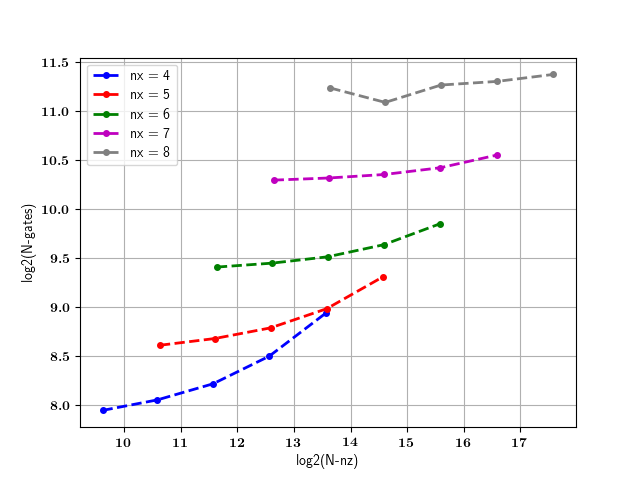

In [31]:
# -------------------------------------------------------------------------
# --- PLOT the scan: N-gates vs Nnz ---
# -------------------------------------------------------------------------

scaling_gates_nx4 = [
  # nx, nv, N_nonzero, N_gates (Rc as 1)
    [4,  4,       784,    246],
    [4,  5,      1536,    265],
    [4,  6,      3040,    297],
    [4,  7,      6048,    361],
    [4,  8,     12064,    489],
]
scaling_gates_nx5 = [    
    [5,  4,      1584,    390],
    [5,  5,      3104,    409],
    [5,  6,      6144,    441],
    [5,  7,     12224,    505],
    [5,  8,     24384,    633]
]
scaling_gates_nx6 = [
    [6,  4,      3184,    678],
    [6,  5,      6240,    697],
    [6,  6,     12352,    729],
    [6,  7,     24576,    794],
    [6,  8,     49024,    921],
]
scaling_gates_nx7 = [
    [7, 4,       6384,   1254],
    [7, 5,      12512,   1273],
    [7, 6,      24768,   1305],
    [7, 7,      49280,   1369],
    [7, 7,      98304,   1497]
]
scaling_gates_nx8 = [   
    [8, 4,      12784,   2406],
    [8, 5,      25056,   2173],
    [8, 6,      49600,   2457],
    [8, 7,      98688,   2521],
    [8, 8,     196864,   2649]
]


# --- FUNCTIONS ---
def get_data_for_one_nx(scaling_gates_nx):
    nx_chosen = scaling_gates_nx[0][0]
    
    Nnz_array = []
    N_gates_array = []
    Nv_array = []
    for one_nv in scaling_gates_nx:
        Nv_array.append(1 << one_nv[1])
        Nnz_array.append(one_nv[2])
        N_gates_array.append(one_nv[3])
    
#     return nx_chosen, Nv_array, Nnz_array, N_gates_array
    return nx_chosen, Nv_array, np.log2(Nnz_array), np.log2(N_gates_array)
# -----------------

# --- PLOT the scan ---
fig = plt.figure()
ax = fig.add_subplot(111)

nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array = get_data_for_one_nx(scaling_gates_nx4)
ax.plot(log_Nnz_array, log_N_gates_array, 'b', linewidth = 2, linestyle='--',    marker='o', markersize=4, label='nx = {:d}'.format(nx_chosen))

nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array = get_data_for_one_nx(scaling_gates_nx5)
ax.plot(log_Nnz_array, log_N_gates_array, 'r', linewidth = 2, linestyle='--',    marker='o', markersize=4, label='nx = {:d}'.format(nx_chosen))

nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array = get_data_for_one_nx(scaling_gates_nx6)
ax.plot(log_Nnz_array, log_N_gates_array, 'g', linewidth = 2, linestyle='--',    marker='o', markersize=4, label='nx = {:d}'.format(nx_chosen))

nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array = get_data_for_one_nx(scaling_gates_nx7)
ax.plot(log_Nnz_array, log_N_gates_array, 'm', linewidth = 2, linestyle='--',    marker='o', markersize=4, label='nx = {:d}'.format(nx_chosen))

nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array = get_data_for_one_nx(scaling_gates_nx8)
ax.plot(log_Nnz_array, log_N_gates_array, 'gray', linewidth = 2, linestyle='--', marker='o', markersize=4, label='nx = {:d}'.format(nx_chosen))

plt.xlabel('log2(N-nz)')
plt.ylabel("log2(N-gates)")
ax.legend()
plt.grid(True)
plt.show()

del nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array

In [32]:
# -------------------------------------------------------------------------
# --- Save the scan ---
# -------------------------------------------------------------------------
mix.reload_module(mix)

nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array = get_data_for_one_nx(scaling_gates_nx4)
mix.save_dat_plot_1d_file(path_save_ + "/scan_N_gates_nx4.dat",    log_Nnz_array, log_N_gates_array)

nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array = get_data_for_one_nx(scaling_gates_nx5)
mix.save_dat_plot_1d_file(path_save_ + "/scan_N_gates_nx5.dat",    log_Nnz_array, log_N_gates_array)

nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array = get_data_for_one_nx(scaling_gates_nx6)
mix.save_dat_plot_1d_file(path_save_ + "/scan_N_gates_nx6.dat",    log_Nnz_array, log_N_gates_array)

nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array = get_data_for_one_nx(scaling_gates_nx7)
mix.save_dat_plot_1d_file(path_save_ + "/scan_N_gates_nx7.dat",    log_Nnz_array, log_N_gates_array)

nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array = get_data_for_one_nx(scaling_gates_nx8)
mix.save_dat_plot_1d_file(path_save_ + "/scan_N_gates_nx8.dat",    log_Nnz_array, log_N_gates_array)


del nx_chosen, Nv_array, log_Nnz_array, log_N_gates_array

write data to a file: ../results/KIN1D1D-results/figs//scan_N_gates_nx4.dat
write data to a file: ../results/KIN1D1D-results/figs//scan_N_gates_nx5.dat
write data to a file: ../results/KIN1D1D-results/figs//scan_N_gates_nx6.dat
write data to a file: ../results/KIN1D1D-results/figs//scan_N_gates_nx7.dat
write data to a file: ../results/KIN1D1D-results/figs//scan_N_gates_nx8.dat


In [26]:
# -------------------------------------------------------------------------------------------------------------
# --- [OPTIONAL] Compare the matrix obtained from QC simulation of the oracle with the block-encoded matrix ---
# -------------------------------------------------------------------------------------------------------------
mix.reload_module(qucf_r)

dd_res = qucf_r.read_matrix_sparse(path_, "flat_OUTPUT.hdf5") 
A_F_recon = dd_res["A"].get_slice(0, 0, Nvar_work)
B_fixed_recon, _ = kin.extract_fixed_matrix_from_F(nx_work, nv_work, A_F_recon, D_F) # not only the second normalization but also extraction of flat-elements;
B_fixed_recon.is_the_same_as(B_fixed, prec = 1e-10)
del A_F_recon, B_fixed_recon

Reading the matrix from: flat_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  08-12-2023 14:47:58
matrix name:  U_BE
N = 512
The matrices are the same


<IPython.core.display.Javascript object>


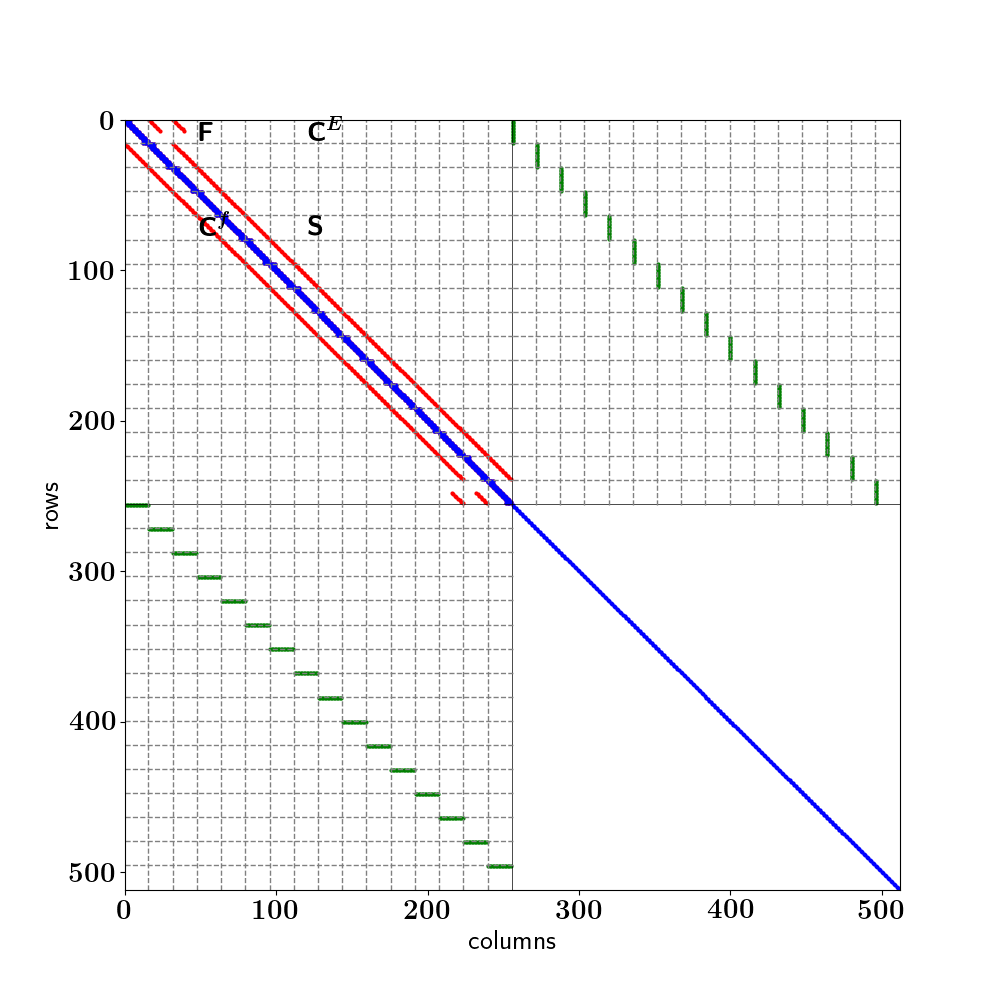

In [129]:
# --------------------------------------------------------------
# --- PLOT the matrix structure in different colors ---
# --------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(kin)

A_CE  = A_norm.get_slice(0,         Nvar_work, Nvar_work)
A_Cf  = A_norm.get_slice(Nvar_work,         0, Nvar_work)
A_S   = A_norm.get_slice(Nvar_work, Nvar_work, Nvar_work)

fig_B_colored_structure = kin.plot_colored_A_structure(
    Nx_work, Nv_work, 
    B_fixed, D_F, A_CE, A_Cf, A_S,
    flag_save = False, 
    path_save = path_save_, 
    fontsize = 20, 
    cmap='bwr'
)

del A_CE, A_Cf, A_S

In [128]:
# ---------------------------------------------------------------
# --- Function to print matrix subblocks ---
# ---------------------------------------------------------------
mix.reload_module(mix)
def print_submatrix(Nx, Nv, B): 
    print("****** Nv: {:d} *************************************".format(Nv))
    
    ir_x, ic_x = 0, 0 # x[0], diag
#     ir_x, ic_x = 0, 1 # V-f: x[0], diag+1
#     ir_x, ic_x = 0, 2 # V-f: x[0], diag+2
#     ir_x, ic_x = 0, 3 # V-f: x[0], diag+3

#     ir_x, ic_x = 1, 0 # V-f: x[1], diag-1
#     ir_x, ic_x = 1, 1 # V-f: x[1], diag
#     ir_x, ic_x = 1, 2 # V-f: x[1], diag+1
#     ir_x, ic_x = 1, 3 # V-f: x[1], diag+2

#     ir_x, ic_x = 2, 1 # V-f: x[1], diag-1
#     ir_x, ic_x = 2, 2 # V-f: x[1], diag
#     ir_x, ic_x = 2, 3 # V-f: x[1], diag+1

#     ir_x, ic_x = 3, 2 # V-f: x[1], diag-1
#     ir_x, ic_x = 3, 3 # V-f: x[1], diag
#     ir_x, ic_x = 3, 4 # V-f: x[1], diag+1

#     ir_x, ic_x = Nx-1, Nx-4 # V-f: x[1], diag-3
#     ir_x, ic_x = Nx-1, Nx-3 # V-f: x[1], diag-2
#     ir_x, ic_x = Nx-1, Nx-2 # V-f: x[1], diag-1
#     ir_x, ic_x = Nx-1, Nx-1 # V-f: x[1], diag

    
    # --------------------------------------------------
    N_print = Nv
    ir_start, ic_start = Nv * ir_x, Nv * ic_x
    
    B.print_matrix_real(
        ir_start, ic_start, N_print,
        ff=[6, 3, "e"], 
        n_in_row = N_print, 
        gap_be = " ", 
    )
    return
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------

# *** PRINT MATRICES D of different sizes ***
print_submatrix(Nx_work, Nv_work, B_fixed)  
print_submatrix(Nx_work, Nv_work, B_values)  

****** Nv: 16 *************************************
--- 0:  0.000e+00 -1.454e-04 1.164e-04 -4.114e-05 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
--- 1:  2.909e-05 0.000e+00 4.114e-05 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
--- 2:  0.000e+00 2.909e-05 0.000e+00 4.114e-05 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
--- 3:  0.000e+00 0.000e+00 4.114e-05 0.000e+00 2.909e-05 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
--- 4:  0.000e+00 0.000e+00 0.000e+00 4.114e-05 0.000e+00 2.909e-05 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
--- 5:  0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.909e-05 0.000e+00 2.909e-05 0.000e+00 0.000e+00 0.000e+0

In [17]:
theta_y = 3.141310074962e+00
print("{:20.6e}".format(np.cos(theta_y/2.)))

        1.412893e-04


In [27]:
theta_y, theta_z = 3.109751982373e+00, -3.136488498004e+00
print("{:20.3e}".format(np.exp(- 1j * theta_z/2.) * np.cos(theta_y/2.)))

8.839e-02
3.591e-06+1.407e-03j
           1.407e-03


In [83]:
mix.reload_module(mix)

xx = np.array([
    [10, 20, 30,  40],
    [100, 0,  0, 200],
    [1,   2,  0,   0],
    [23,  0, 42,   0]
])


xx_sparse = mix.form_sparse_matrix(xx)

# xx_sparse.get_slice(1,0,2).get_data()
xx_sparse.get_slice(2,2,2).form_dense_matrix().real








array([[ 0.,  0.],
       [42.,  0.]])

In [56]:
%tb

SystemExit: -1

In [23]:
xx_sparse.get_data()

(4,
 10,
 array([ 0,  4,  6,  8, 10]),
 array([0, 1, 2, 3, 0, 3, 0, 1, 0, 2]),
 array([ 10.+0.j,  20.+0.j,  30.+0.j,  40.+0.j, 100.+0.j, 200.+0.j,
          1.+0.j,   2.+0.j,  23.+0.j,  42.+0.j]))